In [1]:
# Dataframe and numeric manipulations
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Display preferences
pd.options.display.max_rows = 999
pd.set_option('display.float_format', str)

In [2]:
# Local module(s) to use
import wrangle as w
import explore as e

## Background on what the '1033 Program' is:
The '1033 Program' origin (per the official Federal program site):

*In the National Defense Authorization Act for fiscal years 1990 and 1991, Congress authorized the transfer of excess DoD property to federal, state and local law enforcement agencies. Congress later passed the NDAA for fiscal year 1997, which allows law enforcement agencies to acquire property for bona fide law enforcement purposes – particularly those associated with counter-drug and counter-terrorism activities. The program has been named in the press and elsewhere as the “1033 Program,” which refers to the numbered section of the 1997 NDAA that granted permanent authority to the Secretary of Defense to transfer defense material to federal, state and local law enforcement agencies.* 

The official site for this program: 
https://www.dla.mil/DispositionServices/Offers/Reutilization/LawEnforcement/PropertySearch.aspx

For a wider, quick summation of how this program came to being such resources may be useful:
- https://www.youtube.com/watch?v=60beeYMCmGI
    - A Business Insider overview of the program from the founding programs to modern 'creation'/extensions
- https://www.youtube.com/watch?v=8vr9UMepwU8
    - A short BBC overview of the program in a modern context

In short the US has a robust, well-established DoD to Police pipeline for military equipment. The US is, with intent, militarizing their Police departments with inconsistent oversight, irregular policy, and subdued transparency. 

However, as noted: **"Other equipment, such as Weapons, Aircrafts, and Tactical Vehicles, are not issued online. These items are coordinated through LESO Commodity Leads and State Coordinators."**

Yet, as any quick glance at the data shows the majority of items, in a monetary and quantitative sense, fall under these categories. **A lack of transparency surrounding this topic, the equipment itself, and the agencies involved seems to be intentional at both a federal and state level.**

The data for this report was collected from this Kaggle source:
https://www.kaggle.com/datasets/jpmiller/military-equipment-for-local-law-enforcement?select=dod_all_states.csv

For a robust and ongoing exploration of this data please see (no affiliation to myself):
https://project1033.org/

## Wrangle: Acquisition/Prepare
As previously stated this data was initially gathered from the above Kaggle webpage. It was largely already useable and only needed a few additional modifications. 

The preparation included handling the null values for *DEMIL_IC*, which was done by filling in 9910 values with '1'. This was done after inspecting the data for the most frequent value, but more importantly through research about the values themselves. The 1 value is largely the default value and since these are items that are being handled with intent it seemed a reasonable value to assign for our purposes. The other values are largely for specific demolition requirements or details and should be assigned already prior to the distribution of the equipment. 

Additionally, needed datatypes were modified for the *DEMIL_IC* code from a float to an object type and the *Ship_Date* was changed to a datetime type and used for the indexing of the dataframe. 

A column *total_value* was created using the *Acquisition_Value* and *Quantity* columns to better represent the value of the transactions. 

In [3]:
# Acquire and prepare (initially) the dataframe with our wrangle module
df = w.wrangle_1033()

In [4]:
# Quick glance at what the dataframe structure and information is
df.head()

,State,Agency_Name,NSN,Item_Name,Quantity,UI,Acquisition_Value,DEMIL_Code,DEMIL_IC,Ship_Date,total_value
Ship_Date,,,,,,,,,,,
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0
1990-05-03,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1,1990-05-03,138.0


## Exploration (Initial Questions included):

### Question: What is the overall distribution of equipment?
For the dataframe the main target variable will be considered *total_value*

In [5]:
# Our target variable
y = df.total_value

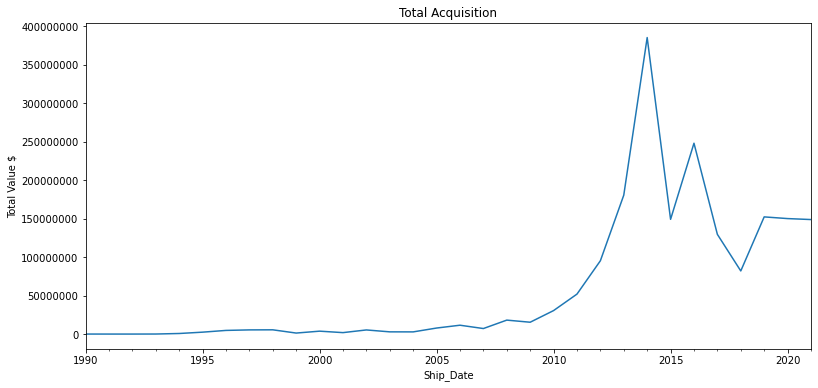

In [8]:
# Giving a visualization of the Yearly Total Acquisition of equipment
e.yearly_viz(df, y)

In [9]:
df.total_value.sum()

1899669153.4699998